In [ ]:
import os
import sys

# Check if __file__ is defined
if '__file__' in globals():
    # Running from a script
    script_dir = os.path.dirname(__file__)
else:
    # Running in an environment like Jupyter
    script_dir = os.getcwd()

# Add parent directory to sys.path
sys.path.append(os.path.join(script_dir, '..'))


import numpy as np
from dezero import Variable


# Step28: Rosenbrock(base)

$\begin{aligned}
y = 100 * (x_{1} - x_{0}^2)^2 + (x_{0} - 1)^2
\end{aligned}$

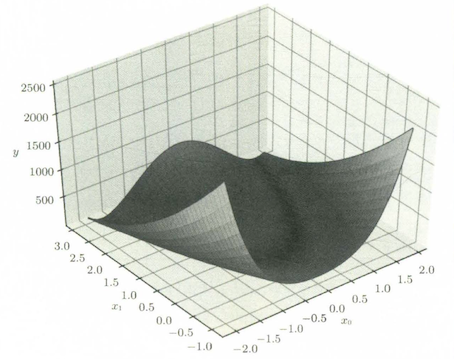

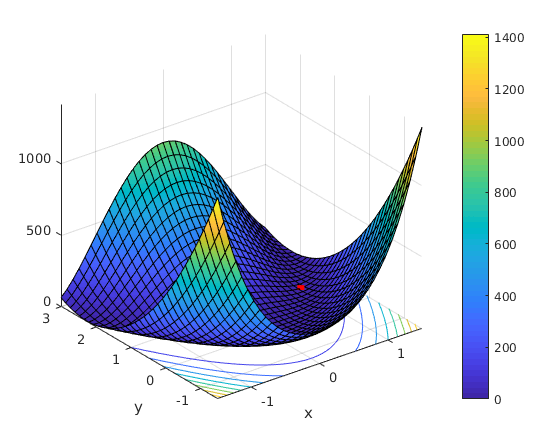

In [ ]:

def rosenbrock(x, x1):
    y = 100 * (x1 - x0**2)**2 + (x0 - 1) **2
    return y

x0 = Variable(np.array([0.0]))
x1 = Variable(np.array([2.0]))
y = rosenbrock(x0, x1)
y.backward()
print(x0.grad, x1.grad)


In [ ]:
x0 = Variable(np.array([0.0]))
x1 = Variable(np.array([2.0]))
ITERS = 100
lr = 0.001
for _ in range(ITERS):
    print(f"{x0.data[0]:<2.6f} {x1.data[0]:<2.6f} {y.data[0]:<3.6f}")

    x0.reset_grad(), x1.reset_grad()
    y = rosenbrock(x0, x1)
    y.backward()

    x0.data -= x0.grad * lr
    x1.data -= x1.grad * lr    


# Step29: 牛顿二次近似

$\begin{aligned}
y = x^4 - 2x^2
\end{aligned}$

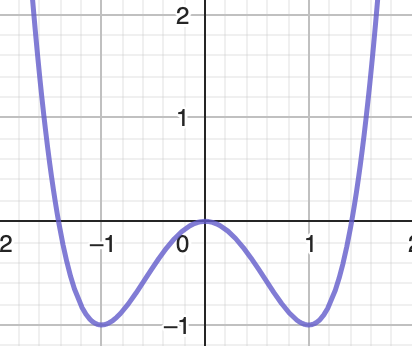


In [ ]:
def f(x):
    y = x**4 - 2 * x**2
    return y
# the 1st derivation of f(x)
def df1(x):
    return 4 * x**3 - 4 * x

# the 2nd derivation of f(x)
def df2(x):
    return 12 * x ** 2 - 4

In [ ]:
# gradient

x = Variable(np.array([2.0]))
ITERS = 870
lr = 0.001
for _ in range(ITERS):
    print(f"{x.data[0]:<2.6f} {y.data[0]:<3.6f}")

    x.reset_grad()
    y = f(x)
    y.backward()

    x.data -= x.grad * lr

f(x) approximates at each a=[2.0, 1.45, ...]

$\begin{aligned}
At: x=2.00, f(x) \approx 8.00 + 24.00(x-2.00) + 44.00(x-2.00)^2
\end{aligned}$

$\begin{aligned}
At: x=1.45, f(x) \approx 0.24 + 6.49(x-1.45) + 21.39(x-1.45)^2
\end{aligned}$

$\begin{aligned}
At: x=1.15, f(x) \approx -0.89 + 1.50(x-1.15) + 11.90(x-1.15)^2
\end{aligned}$

$\begin{aligned}
At: x=1.03, f(x) \approx -1.00 + 0.21(x-1.03) + 8.62(x-1.03)^2
\end{aligned}$

$\begin{aligned}
At: x=1.00, f(x) \approx -1.00 + 0.01(x-1.00) + 8.02(x-1.00)^2
\end{aligned}$


In [ ]:
# Newton

x = Variable(np.array([2.0]))
ITERS = 5
for _ in range(ITERS):
    y = f(x.data)
    print(f"{x.data[0]:<2.6f} {y.data[0]:<3.6f}")
    
    # a = x.data[0]
    # print('$\\begin{aligned}')
    # print(f'At: x={a:<2.6f}, f(x) \\approx {f(a):<2.6f} + {df1(a):<2.6f}(x-{a:<2.6f}) + {df2(a):<2.6f}(x-{a:<2.6f})^2')
    # print('\end{aligned}$', end="\n\n")

    x.data -= df1(x.data) / df2(x.data)